# Installing required libraries

In [2]:
!pip install missingpy
!pip install catboost

     |████████████████████████████████| 51kB 4.0MB/s 
     |████████████████████████████████| 67.3MB 57kB/s 


# Imports section

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.impute import KNNImputer
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from datetime import datetime
from sklearn.model_selection import train_test_split
from missingpy import MissForest
from sklearn.metrics import roc_curve, auc,recall_score,precision_score,accuracy_score,roc_auc_score
from xgboost import XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier, plot_importance
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
warnings.filterwarnings("ignore")

# Reading data

In [12]:
data_train = pd.read_csv('/content/drive/MyDrive/ML/credit_card_hackathon/credit_card_hackathon/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/ML/credit_card_hackathon/credit_card_hackathon/test.csv')

train_data_id_list = data_train['ID']
test_data_id_list = test_data['ID']

del data_train['ID']
del test_data['ID']

train_data = data_train.copy()


# Data Understanding

In [13]:
train_data.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [14]:
test_data.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Male,29,RG254,Other,X1,25,Yes,742366,No
1,Male,43,RG268,Other,X2,49,NaN,925537,No
2,Male,31,RG270,Salaried,X1,14,No,215949,No
3,Male,29,RG272,Other,X1,33,No,868070,No
4,Female,29,RG270,Other,X1,19,No,657087,No


In [15]:
print(train_data.shape)
print(test_data.shape)

(245725, 10)
(105312, 9)


In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               245725 non-null  object
 1   Age                  245725 non-null  int64 
 2   Region_Code          245725 non-null  object
 3   Occupation           245725 non-null  object
 4   Channel_Code         245725 non-null  object
 5   Vintage              245725 non-null  int64 
 6   Credit_Product       216400 non-null  object
 7   Avg_Account_Balance  245725 non-null  int64 
 8   Is_Active            245725 non-null  object
 9   Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.7+ MB


In [17]:
train_data.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [18]:
train_data.columns

Index(['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance', 'Is_Active', 'Is_Lead'],
      dtype='object')

In [19]:
train_data.isna().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [20]:
print(train_data.isna().sum()/len(train_data)*100)
print(test_data.isna().sum()/len(test_data)*100)

Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64


# Descriptive Analytics

Male      134197
Female    111528
Name: Gender, dtype: int64


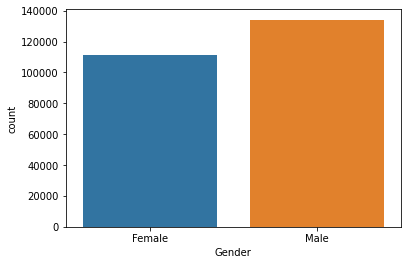

In [21]:
sns.countplot(train_data.Gender)
print(train_data['Gender'].value_counts())

28    14533
29    13284
27    13005
30    11066
26     9039
      ...  
82      749
83      694
84      624
85      604
23        1
Name: Age, Length: 63, dtype: int64


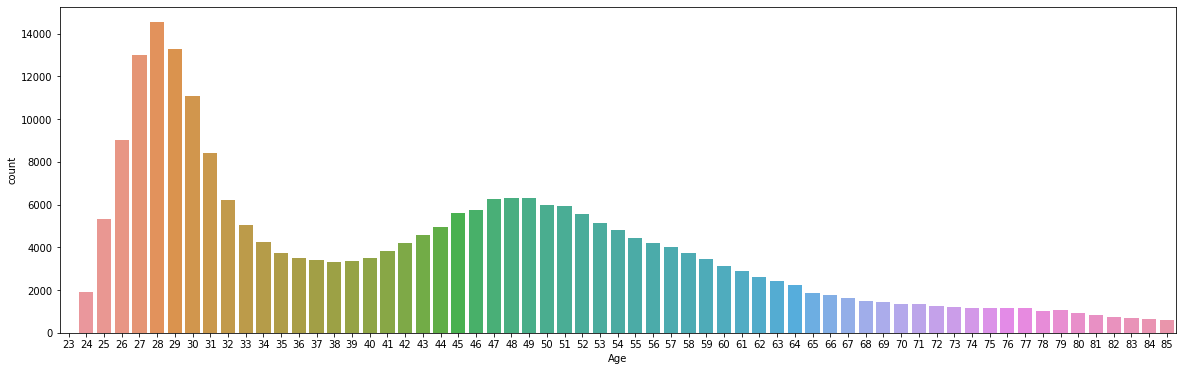

In [22]:
plt.figure(figsize=(20,6))
sns.countplot(train_data.Age)
print(train_data['Age'].value_counts())

RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64


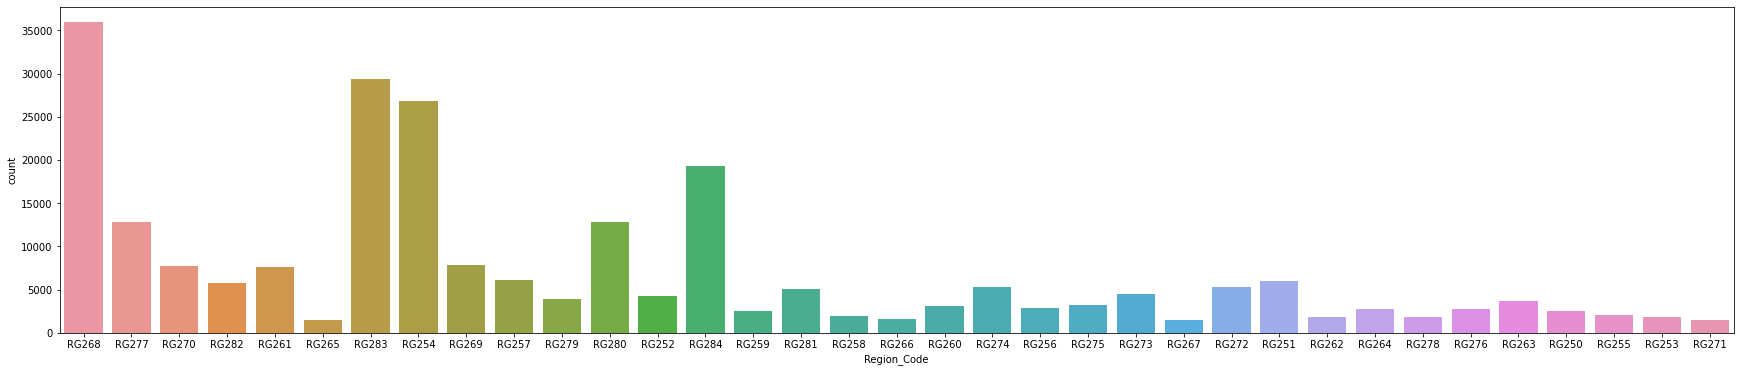

In [23]:
plt.figure(figsize=(30,6))
sns.countplot(train_data.Region_Code)
print(train_data['Region_Code'].value_counts())

In [24]:
print(test_data['Region_Code'].value_counts())

RG268    15125
RG283    12881
RG254    11737
RG284     8173
RG277     5596
RG280     5529
RG270     3440
RG269     3288
RG261     3286
RG251     2678
RG257     2588
RG272     2338
RG282     2337
RG274     2208
RG281     2144
RG252     1811
RG273     1803
RG263     1615
RG279     1600
RG275     1383
RG260     1300
RG264     1241
RG256     1194
RG276     1185
RG259     1102
RG250     1048
RG255      891
RG278      824
RG258      812
RG253      810
RG262      800
RG265      668
RG271      654
RG266      631
RG267      592
Name: Region_Code, dtype: int64


Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64


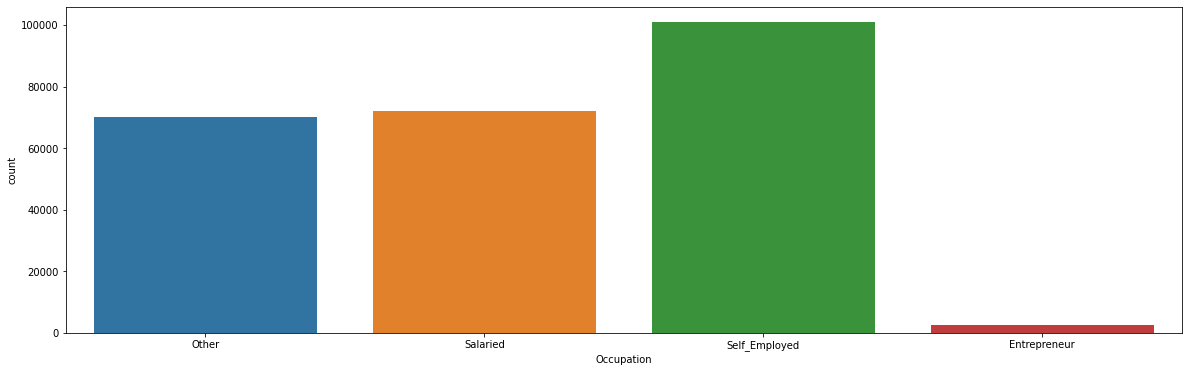

In [25]:
plt.figure(figsize=(20,6))
sns.countplot(train_data.Occupation)
print(train_data['Occupation'].value_counts())

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64


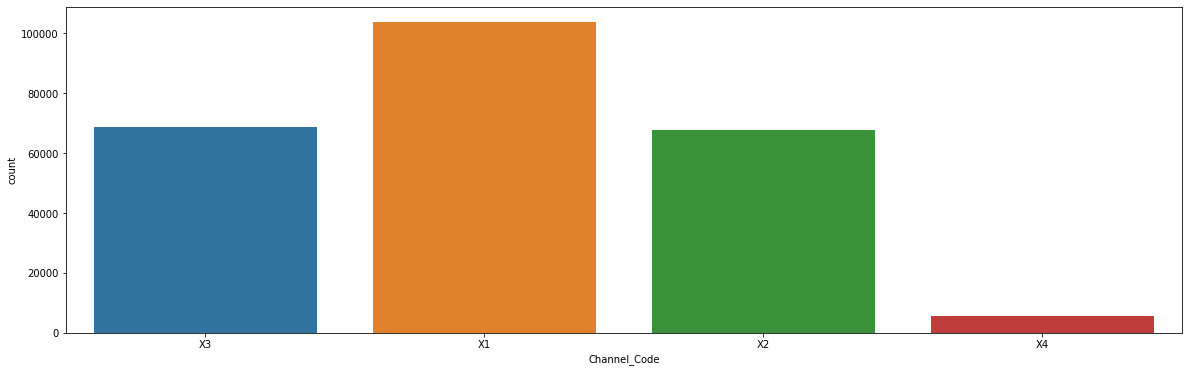

In [26]:
plt.figure(figsize=(20,6))
sns.countplot(train_data.Channel_Code)
print(train_data['Channel_Code'].value_counts())

13     12338
21     12277
14     12267
15     12242
19     12212
       ...  
128      501
129      499
135       19
133       18
134       14
Name: Vintage, Length: 66, dtype: int64


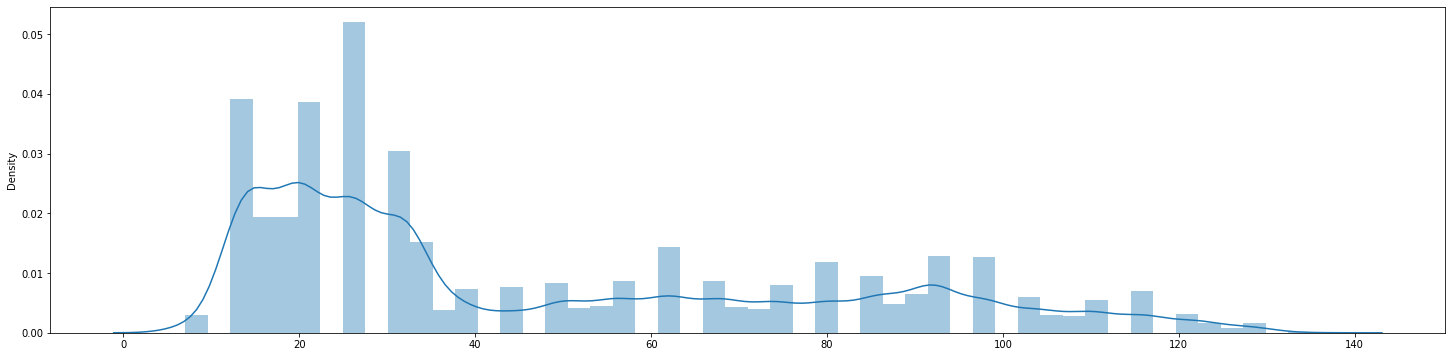

In [27]:
plt.figure(figsize=(25,6))
#sns.countplot(train_data.Vintage)
print(train_data['Vintage'].value_counts())
sns.distplot(x=train_data.Vintage)

No     144357
Yes     72043
Name: Credit_Product, dtype: int64


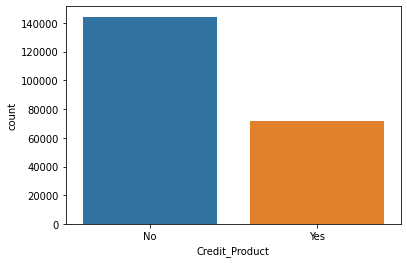

In [28]:
sns.countplot(train_data.Credit_Product)
print(train_data['Credit_Product'].value_counts())

No     150290
Yes     95435
Name: Is_Active, dtype: int64


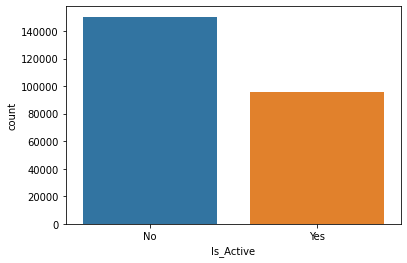

In [29]:
sns.countplot(train_data.Is_Active)
print(train_data['Is_Active'].value_counts())

mean for salary is  1128403.1010194323
median for salary is  894601.0


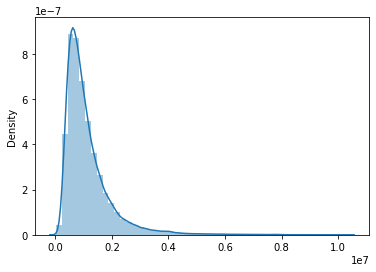

In [30]:
print('mean for salary is ',train_data.Avg_Account_Balance.mean())
print('median for salary is ',train_data.Avg_Account_Balance.median())
sns.distplot(x=train_data.Avg_Account_Balance)

# Pre-Processing Data (filling Nan, Label Encoding, Transformation)

In [31]:
def dummy_encoding(df,colList):
    for col in colList:
        df = pd.get_dummies(df, columns=[col],drop_first=True)
    print(df.head())
    return df

def label_encoding(df,colList):
    label_encoder = preprocessing.LabelEncoder()
    for col in colList:        
        df[col]= label_encoder.fit_transform(df[col].fillna('Z'))
    return df

def label_encoding_single(colList):    
    for col in colList:      
        label_encoder = preprocessing.LabelEncoder()  
        train_data[col]= label_encoder.fit_transform(train_data[col].fillna('Z'))
        test_data[col]= label_encoder.fit_transform(test_data[col].fillna('Z'))
    pass

label_encoding_single(['Credit_Product', 'Region_Code', 'Gender', 'Occupation', 'Channel_Code', 'Is_Active'])


In [32]:
train_data.isna().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [33]:
train_data.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,18,1,2,43,0,1045696,0,0
1,0,30,27,2,0,32,0,581988,0,0
2,0,56,18,3,2,26,0,1484315,1,0
3,1,34,20,2,0,19,0,470454,0,0
4,0,30,32,2,0,33,0,886787,0,0


In [34]:
test_data.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,1,29,4,1,0,25,1,742366,0
1,1,43,18,1,1,49,2,925537,0
2,1,31,20,2,0,14,0,215949,0
3,1,29,22,1,0,33,0,868070,0
4,0,29,20,1,0,19,0,657087,0


In [35]:
train_data['Credit_Product'].value_counts()

0    144357
1     72043
2     29325
Name: Credit_Product, dtype: int64

In [36]:
test_data['Credit_Product'].value_counts()

0    61608
1    31182
2    12522
Name: Credit_Product, dtype: int64

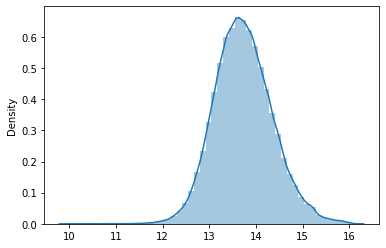

In [37]:
train_data['Avg_Account_Balance'] = train_data['Avg_Account_Balance'].apply(lambda x: np.log(x+1))
test_data['Avg_Account_Balance'] = test_data['Avg_Account_Balance'].apply(lambda x: np.log(x+1))
sns.distplot(x=train_data.Avg_Account_Balance)

In [38]:
train_data.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,18,1,2,43,0,13.860194,0,0
1,0,30,27,2,0,32,0,13.274207,0,0
2,0,56,18,3,2,26,0,14.210465,1,0
3,1,34,20,2,0,19,0,13.061456,0,0
4,0,30,32,2,0,33,0,13.695361,0,0


In [39]:
test_data.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,1,29,4,1,0,25,1,13.517599,0
1,1,43,18,1,1,49,2,13.738130,0
2,1,31,20,2,0,14,0,12.282802,0
3,1,29,22,1,0,33,0,13.674029,0
4,0,29,20,1,0,19,0,13.395573,0


# Correlation Matrix

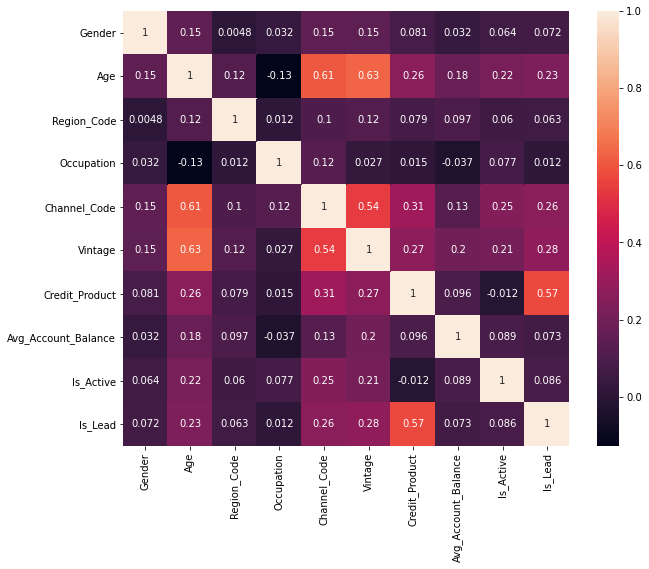

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(train_data.corr(),annot=True)

In [41]:
target = 'Is_Lead'
df1=train_data.copy()
X = df1.loc[:, df1.columns!=target]
Y = df1.loc[:, df1.columns==target]

# local code for testing

0    187437
1     58288
Name: Is_Lead, dtype: int64


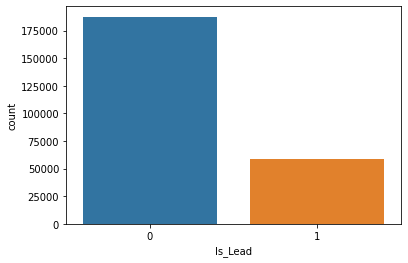

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.20, 
                                                    random_state=42)
ax = sns.countplot(x=df1[target], data=df1)
print(df1[target].value_counts())

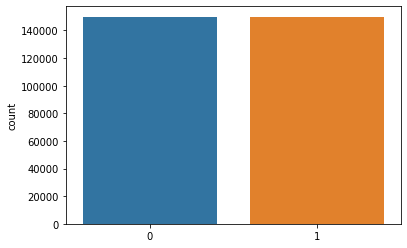

In [117]:
over = RandomOverSampler()
x, y = over.fit_resample(X_train, Y_train[target])
df_sampled = pd.DataFrame(x, columns = X_train.columns)
sns.countplot(y)

In [118]:
def generate_auc_roc_curve(clf, X_test,Y_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]    
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass


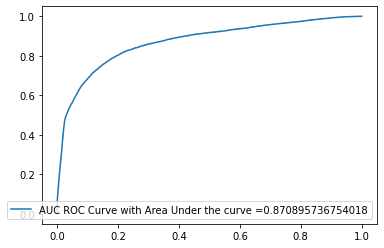

In [119]:

xgboostModel = XGBClassifier(learning_rate =0.1, n_estimators=200, max_depth=4,
                            min_child_weight=10, gamma=5, subsample=0.8, colsample_bytree=1,
                            nthread=-1, scale_pos_weight=1,seed=27,
                            class_weight='balanced',booster='dart')
xgb = XGBClassifier(class_weight='balanced')

model = xgboostModel

model.fit(df_sampled, y)

y_pred = model.predict_proba(X_test)[:,1]
generate_auc_roc_curve(model, X_test,Y_test)

In [ ]:
#cat = CatBoostClassifier(iterations=150,learning_rate=0.05, depth=10,eval_metric='AUC',l2_leaf_reg = 5)
#cat.fit(df_sampled, y, verbose=True)

#y_pred = cat.predict_proba(X_test)[:,1]
#generate_auc_roc_curve(cat, X_test,Y_test)

# production code

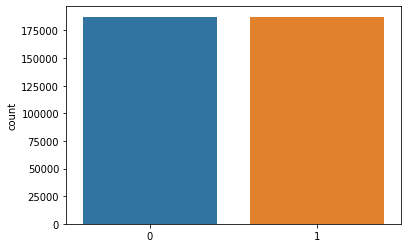

In [120]:
over = RandomOverSampler()
x, y = over.fit_resample(X, Y[target])
df_sampled_final = pd.DataFrame(x, columns = X.columns)
sns.countplot(y)

In [121]:
model.fit(df_sampled_final,y)
y_pred = model.predict_proba(test_data)[:,1]

In [122]:
final_df = pd.DataFrame({"ID": test_data_id_list, target:y_pred})

In [123]:
final_df.to_csv('prediction23.csv',index=False)